In [ ]:
import pandas as pd

path_data = "Data/starbucks_drinkMenu_expanded.csv"

df = pd.read_csv(path_data)

df.columns = df.columns.str.strip()

df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    str    
 1   Beverage                 242 non-null    str    
 2   Beverage_prep            242 non-null    str    
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    str    
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    str    
 14  Vitamin C (% DV)         242 non-null

In [ ]:
print("Data isEmpty")
display(df.isnull().sum().to_frame(name="Total null"))

display(df[df["Caffeine (mg)"].isnull()])

print("\nData Duplicated")
pd.DataFrame({"Total Duplicate": [df.duplicated().sum()]})



Data isEmpty


,Total null
Beverage_category,0
Beverage,0
Beverage_prep,0
Calories,0
Total Fat (g),0
Trans Fat (g),0
Saturated Fat (g),0
Sodium (mg),0
Total Carbohydrates (g),0
Cholesterol (mg),0


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Caffeine (mg)_was_missing,Total Fat (g)_was_missing



Data Duplicated


,Total Duplicate
0,0


In [ ]:
NUMERIC_IMPUTE_COLS = {
    "Caffeine (mg)" : "median",
    "Total Fat (g)" : "median"
}

for col, strategy in NUMERIC_IMPUTE_COLS.items():
    df[col] = pd.to_numeric(df[col], errors = "coerce")
    df[f"{col}_was_missing"] = df[col].isna().astype(int)

    if strategy == "median":
        df[col] = df[col].fillna(df[col].median())
    else:
        raise ValueError(f"strategy'{strategy}' not supported for {col}")

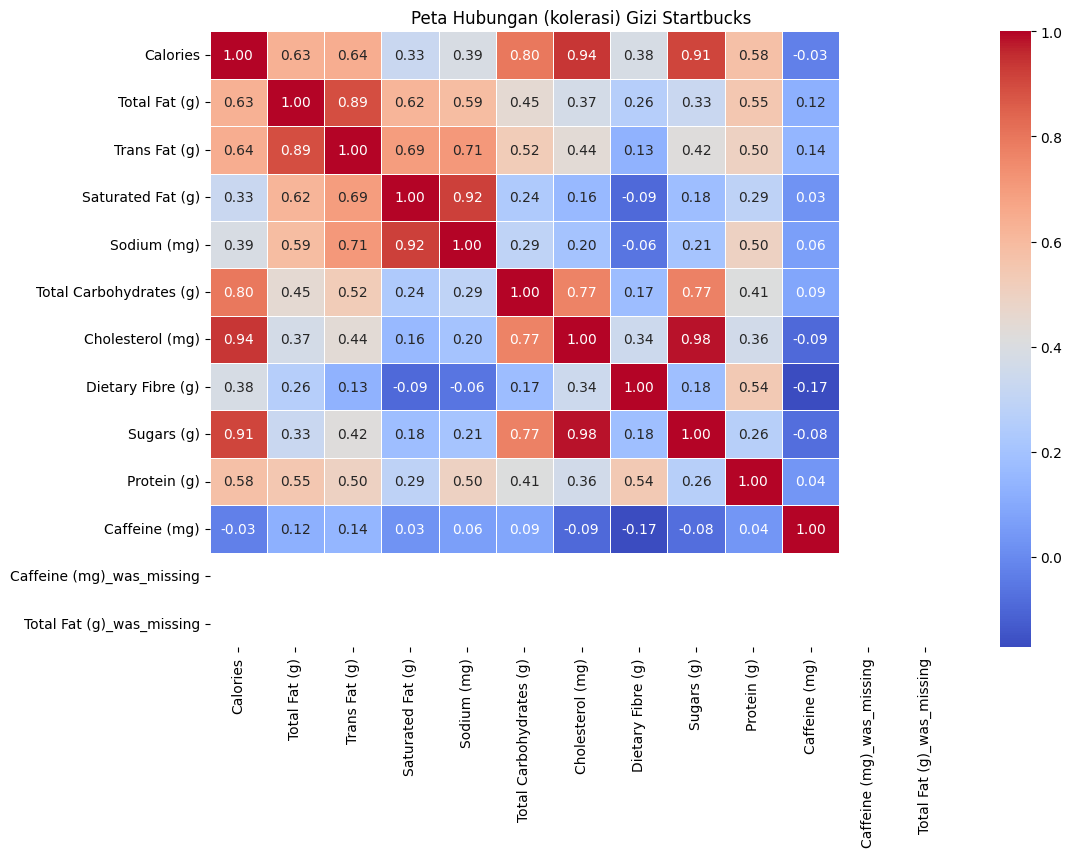

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Map Coleration Starbucks Nutrition')
plt.show()

In [ ]:
path_output = "Data/Cleaned_data/Starbuck Cleaned/Starbucks_cleaned_drinkMenu.csv"

df.to_csv(path_output, index=False)

print(f"Done Export : {path_output}")


Done Export : /Users/dhanydelio/Documents/Cleaned Data for Ai/Starbucks Data/Starbucks_cleaned1.csv
